# Analysis of the titanic data
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. Source https://www.kaggle.com/c/titanic
In this project, I analyzed what sorts of people were likely to survive and what factors contributed for their survival.



In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
titanic_df= pd.read_csv("/Users/YemiEyob/Desktop/analysis/titanic_data.csv")

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


# $\textbf{QUESTIONS}$

1. Who were the passengers?
 
2. Which passengers survived most and which not?
 
3. What factors contribute for the survival of passengers?
4. Statistical test

# 1.1 Who were the passengers (Male, Female, Children)?

In [5]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

There were 577 Male and 314 Female passengers. Were there childrens among the passangers? how does the age distribution of passengers looklike? 

Minimum age of passenger= 0.42
Maximum age of passenger= 80
Average age of passenger= 30
Median age of passenger= 28


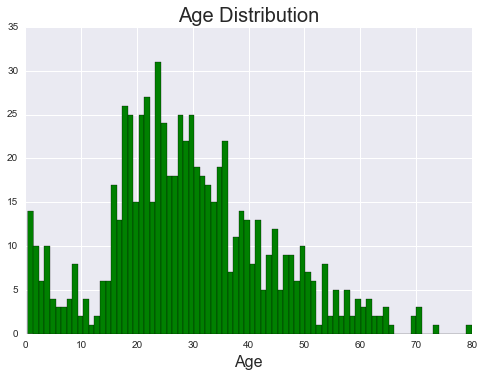

In [153]:
titanic_df.Age.hist(bins=80,color="g")
rc={'axes.labelsize': 16, 'font.size': 18.0, 'legend.fontsize': 12, 'axes.titlesize': 20}
sns.set(rc=rc)
plt.title('Age Distribution')
plt.xlabel("Age")
print "Minimum age of passenger=",titanic_df.Age.dropna().min()
print "Maximum age of passenger=",int(titanic_df.Age.dropna().max())
print "Average age of passenger=",int(round(titanic_df.Age.dropna().mean()))
print "Median age of passenger=",int(round(titanic_df.Age.dropna().median()))

The passangers were in the range from as young as 4 months to as
old as 80 years. The average age of the passengers were ~30 years and the 
median age of the passengers was 28 years.

#  Howmany of the  passengers were Male adults, Children,  Female adults?

Assuming children with ages <=16 years. However, as we saw from the data information, the Age column has "NaN" values and we need to clean out that part when we write our function to categorize the data by age category.

In [13]:
 def child_adult(passangers):
    sex,age=passangers
    if age!="NaN":
        if sex=='female' and age <=16:
            return "Female Child"
        elif sex=='male' and age <=16:
             return "Male Child"
        elif sex=='female' and age>16:
              return "Adult Women"
        elif sex=='male' and age>16:
              return "Adult Men"
        else:
            return 

In [14]:
titanic_df["Person"]=titanic_df[["Sex","Age"]].apply(child_adult,axis=1)
titanic_df["Person"].value_counts()

Adult Men       402
Adult Women     212
Male Child       51
Female Child     49
Name: Person, dtype: int64

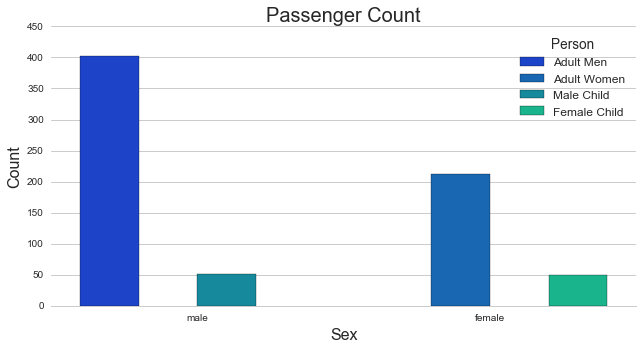

In [133]:
sns.set_style("whitegrid")
g=sns.factorplot("Sex",data=titanic_df,hue="Person",kind='count', size=5, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("Sex", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
sns.plt.title("Passenger Count")
#...   .set(ylim=(0, 1))
g.despine(left=True)  
#rc={'axes.labelsize': 16, 'font.size': 22.0, 'legend.fontsize': 16, 'axes.titlesize': 20}
sns.set(rc=rc)

In total there were 577 Male and 314 Female passengers. From these 
there were 402 Men and 216 Women whose age is above 16,  51 Male and 49 Female whose age is equal to or 
under 16 from all the passangers with registered ages. The age of the remaining 177 passengers were unknown.

From which port were the passengers embarked? Howmany of them were male,
female or by age category (adult men, adult women , male and female children) in each emabarking station?

In [91]:
total_by_embarking= titanic_df["Embarked"].groupby(titanic_df["Sex"]).value_counts()
print "Total number of male and female passengers embarked at each port were:"
print total_by_embarking
print "Number of male and female passengers with registered \n" "ages embarked at each port:",
titanic_df["Embarked"].groupby(titanic_df["Person"]).value_counts()

Total number of male and female passengers embarked at each port were:
Sex      
female  S    203
        C     73
        Q     36
male    S    441
        C     95
        Q     41
dtype: int64
Number of male and female passengers with registered 
ages embarked at each port:

Person         
Adult Men     S    326
              C     64
              Q     12
Adult Women   S    154
              C     47
              Q      9
Female Child  S     32
              C     14
              Q      3
Male Child    S     42
              C      5
              Q      4
dtype: int64

The passengers were embarked from the 3 ports (Q, C,and S). The total 
number of passengers embarked in each port by "Sex" and "Age" category is 
shown in the preceding cell.

# Passengers with family

How many of the passengers were with family and how many without?

In [64]:
titanic_df['With Family']=titanic_df['SibSp']+titanic_df['Parch']

with_family=titanic_df[titanic_df['With Family']!=0]

print "The number of male and female with family were:"

print with_family['Sex'].value_counts()

print "The number of male and female with family and with registered ages \
were:"
print with_family['Person'].value_counts()

print"The number of male and female without family and with registered\
ages were:"

print  titanic_df[titanic_df['With Family']==0]['Person'].value_counts()
#titanic_df['With Family'].grouupby(titanic_df['Sex']).value_counts()

The number of male and female with family were:
female    188
male      166
Name: Sex, dtype: int64
The number of male and female with family and with registered ages were:
Adult Women     120
Adult Men       106
Male Child       43
Female Child     41
Name: Person, dtype: int64
The number of male and female without family and with registeredages were:
Adult Men       296
Adult Women      92
Male Child        8
Female Child      8
Name: Person, dtype: int64


# 2. SURVIVED PASSENGERS

How many Male, Female and Children were survived?

The total number of passengers not survived and survived were :
Not Survived    549
Survived        342
Name: Survivals, dtype: int64


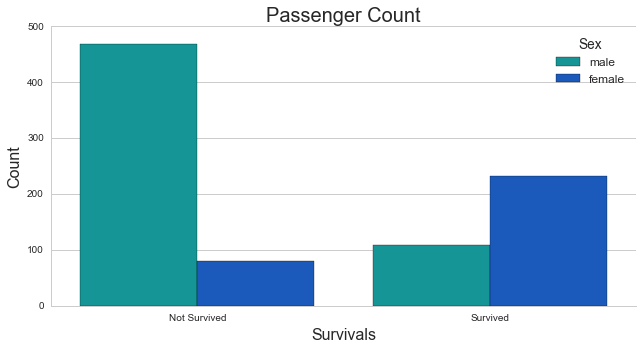

In [141]:
titanic_df["Survivals"]=titanic_df["Survived"].map({0:"Not Survived",1:"Survived"})

print "The total number of passengers not survived and survived were :"

print titanic_df["Survivals"].value_counts()
sns.set_style("whitegrid")
g=sns.factorplot("Survivals",data=titanic_df,hue="Sex",kind='count',size=5, aspect=1.8,palette="winter_r",legend_out=False)
g.set_axis_labels("Survivals", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
sns.plt.title("Passenger Count")
sns.set(rc=rc)

Most passengers were not survived and most of the non survived passengers were male passengers.

# 3. Was the survival of passengers related to the Age and Sex?

In [14]:
DF_survivals=titanic_df[titanic_df["Survivals"]=='Survived'] 

print "The total number of survived passangers by sex were:"

survival_by_sex= titanic_df["Survivals"].groupby(titanic_df['Sex']).value_counts()

print survival_by_sex

print "The Number of Survived Adult Women,Adult Men,\

Female Child and Male Child Were:"

x=titanic_df["Survivals"].groupby(titanic_df['Person']).value_counts()

print x

The total number of survived passangers by sex were:
Sex                 
female  Survived        233
        Not Survived     81
male    Not Survived    468
        Survived        109
dtype: int64
The Number of Survived Adult Women,Adult Men,Female Child and Male Child Were:
Person                    
Adult Men     Not Survived    331
              Survived         71
Adult Women   Survived        164
              Not Survived     48
Female Child  Survived         33
              Not Survived     16
Male Child    Not Survived     29
              Survived         22
dtype: int64


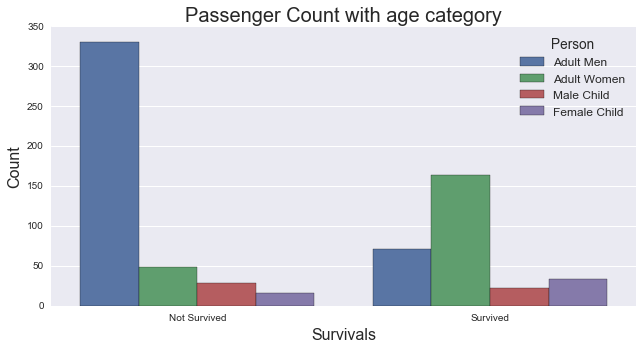

In [142]:
#sns.factorplot("Survivals",data=titanic_df,hue="Person",kind="count")
g=sns.factorplot("Survivals",data=titanic_df,hue="Person",kind='count',size=5, aspect=1.8,legend_out=False)
sns.set_style("whitegrid")
g.set_axis_labels("Survivals", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
sns.plt.title("Passenger Count with age category")
sns.set(rc=rc)

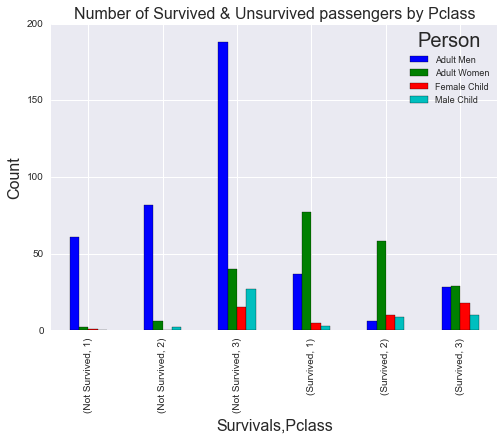

In [155]:
titanic_df.groupby(["Survivals","Pclass"])["Person"].value_counts().unstack().plot(kind='bar').set_ylabel("Count")
sns.plt.title("Number of Survived & Unsurvived passengers by Pclass")
sns.set_style("whitegrid")
#g.set_axis_labels("Survivals", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
#sns.plt.title("Passenger Count with age category")
rc1={'axes.labelsize': 16, 'font.size': 20.0, 'legend.fontsize': 9, 'axes.titlesize': 13}
sns.set(rc=rc1)

Adult women and  children were most survived. However,
male children were less survived than female children.

# Survival probability of passengers by sex

In order to have a clear comparison of the survival of passengers with
gender and age I calculated the survival probabilities of each category. 

In [126]:
Survival_probability_Female=float(survival_by_sex['female']['Survived'])/\
(survival_by_sex['female']['Survived']+survival_by_sex['female']['Not Survived'])

Survival_probability_Male=float(survival_by_sex['male']['Survived'])/\
(survival_by_sex['male']['Survived']+survival_by_sex['male']['Not Survived'])

print "Survival probability of Male Passengers =","{:2.2f}".format(Survival_probability_Male)

print "Survival probability of Female passengers =","{:2.2f}".format(Survival_probability_Female)

Survival probability of Male Passengers = 0.19
Survival probability of Female passengers = 0.74


# Survival probability of passengers with registered ages

In [127]:
Survival_probability_Adult_Men=float(x['Adult Men']['Survived'])/(x['Adult Men']['Survived']+\
                                    x['Adult Men']['Not Survived'])
Survival_probability_Adult_Women=float(x['Adult Women']['Survived'])/(x['Adult Women']['Survived']\
                               +x['Adult Women']['Not Survived'])
Survival_probability_Female_Child= float(x['Female Child']['Survived'])/(x['Female Child']['Survived']\
                               +x['Female Child']['Not Survived'])
Survival_probability_Male_Child=float(x['Male Child']['Survived'])/(x['Male Child']['Survived']\
                               +x['Male Child']['Not Survived'])

print "Survival probability of Adult Men =","{:2.2f}".format(Survival_probability_Adult_Men)
print "Survival probability of Adult Women =","{:2.2f}".format(Survival_probability_Adult_Women)
print "Survival_probability_Female_Child=", "{:2.2f}".format(Survival_probability_Female_Child)  
print "Survival_probability_Male_Child=", "{:2.2f}".format(Survival_probability_Male_Child) 

Survival probability of Adult Men = 0.18
Survival probability of Adult Women = 0.77
Survival_probability_Female_Child= 0.67
Survival_probability_Male_Child= 0.43


In [103]:
#It is interesting to see that adult women were the most survived #passengers
#(77 % survival chance ),followed by female child (67 % survival chance) #and 
#male child (43 % survival chance). Adult men were the list survived with 
#survival chance of 18 %. This shows that gender was one of the factors #for survival of passengers.

From a total of 891 passengers only 342 of them were survived and the reamaining 549
which is ~61 %  were not survived. It is interesting to see that most of the non
survivers were Male. If we compare the inter-gender survival probability of 
the passengers, it is ~19 % for Men and ~74.2 % for Women. Moreover, if
we comapre the inter-gender survival probability of the passengers whose ages were 
registered, inter-gender survival probability of Adult Men is 18 %, Adult Women 
~77 %, Female Child ~67%,and Male Child= 43 %. This clearly shows that 
gender has a crucial effect on survival. We may  ask a question why is this
so? Was there apriority given to save female and children by rescue worksers?
if so why the survival probaility of Male children are less than that of 
Female children? 

In [16]:
#sns.factorplot("Survived",data=titanic_df,hue="Sex",kind="count")

# Was the survival of passengers related to the Pclass?

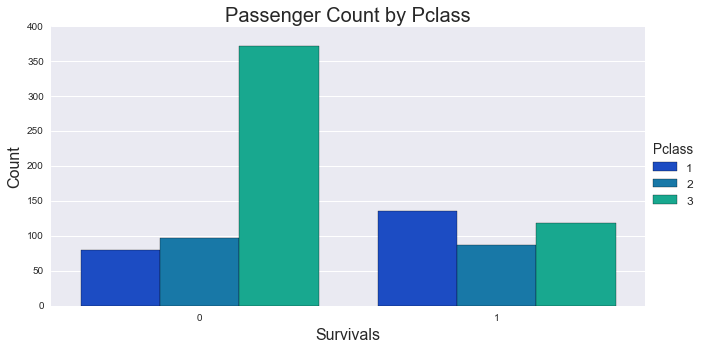

In [157]:
#sns.factorplot("Survived",data=titanic_df,hue="Pclass",kind="count")
g=sns.factorplot("Survived",data=titanic_df,hue="Pclass",kind='count',size=5, aspect=1.8,palette="winter")
g.set_axis_labels("Survivals", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
sns.plt.title("Passenger Count by Pclass")
sns.set_style("whitegrid")
sns.set(rc=rc)

From the above histogram, it seems that most passengers in the third Pclass were
were not servived and those in Pclass 1 were survived.

How many passengers were in each Pclass?

In [128]:
titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There were 216 passengers in Pclass 1,184 in Pclass 2 and 491 in Pclass 3.

# Number of Men and Women in each Pclass

In [20]:
values=[1,2,3]

for value in values:
    
    titanic_class=titanic_df[titanic_df.Pclass==value]
    
    print "For Pclass number","{:d}".format(value)
    
    print titanic_class["Sex"].value_counts()
    
    print titanic_class["Person"].value_counts()
    #print titanic_class["Survivals"].value_counts()

For Pclass number 1
male      122
female     94
Name: Sex, dtype: int64
Adult Men       98
Adult Women     79
Female Child     6
Male Child       3
Name: Person, dtype: int64
For Pclass number 2
male      108
female     76
Name: Sex, dtype: int64
Adult Men       88
Adult Women     64
Male Child      11
Female Child    10
Name: Person, dtype: int64
For Pclass number 3
male      347
female    144
Name: Sex, dtype: int64
Adult Men       216
Adult Women      69
Male Child       37
Female Child     33
Name: Person, dtype: int64


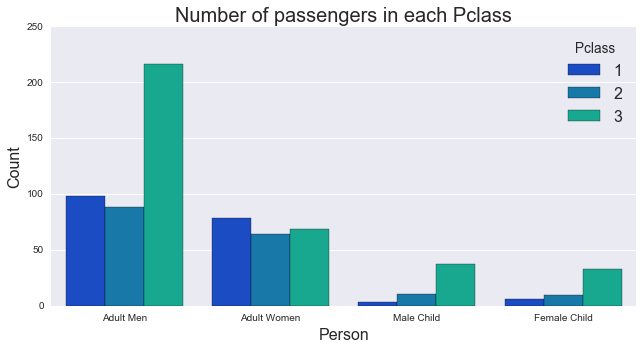

In [105]:
g=sns.factorplot("Person",data=titanic_df, hue="Pclass",kind="count",size=5, aspect=1.8,palette="winter",legend_out=False)
#g=sns.factorplot("Survived",data=titanic_df,hue="Pclass",kind='count',size=5, aspect=1.8,palette="winter")
g.set_axis_labels("Person", "Count")
#g.set_xticklabels(["Adult Men", " Adult Women", "Male Child","Female Child"])
sns.plt.title("Number of passengers in each Pclass")
#legend = plt.legend(fontsize="x-large")
sns.set_style("whitegrid")
sns.set(rc=rc)

In [129]:
per_class_survivals=titanic_df.groupby(['Pclass','Survivals'])

print "The number of survived passengers in each Pclass were:"

per_class_survivals['Person'].value_counts()

The number of survived passengers in each Pclass were:


Pclass  Survivals     Person      
1       Not Survived  Adult Men        61
                      Adult Women       2
                      Female Child      1
        Survived      Adult Women      77
                      Adult Men        37
                      Female Child      5
                      Male Child        3
2       Not Survived  Adult Men        82
                      Adult Women       6
                      Male Child        2
        Survived      Adult Women      58
                      Female Child     10
                      Male Child        9
                      Adult Men         6
3       Not Survived  Adult Men       188
                      Adult Women      40
                      Male Child       27
                      Female Child     15
        Survived      Adult Women      29
                      Adult Men        28
                      Female Child     18
                      Male Child       10
dtype: int64

#  Probability of  survival in each Pclass


In [22]:
def prob_calculator(df):
    df.columns=titanic_df.columns
    survived_dict={}
    total_dict={}
    my_list=[]
    probability={}
    values=[1,2,3]
    
    i=[1,2,3]
    person_list=["Adult Men","Adult Women","Female Child","Male Child"]
    for value in person_list:
    
        df1=df[(df['Pclass'].any()) & (df['Person']==value)&(df['Survivals']=="Survived")]
        survived_dict[value]=df1['Pclass'].value_counts()
        df2=df[(titanic_df['Pclass'].any()) & (df['Person']==value)]
        total_dict[value]=df2['Pclass'].value_counts()
    x={}
    
    for j in i:
        y={}
        for person in person_list:
            
            x[person]=float(survived_dict[person][j])/total_dict[person][j]
        #print survived_dict[person][j],total_dict[person][j]
            y[person]=j,float(format(x[person],'.2f')) #"{:2:3f}".format(x[person])
        my_list.append(y)
    print "The Probability of survival of\
    Adult Men,Adult Women,Female Child,\
    and Male Child for each class is :"
    return my_list# probability


In [23]:
prob_calculator(titanic_df)

The Probability of survival of    Adult Men,Adult Women,Female Child,    and Male Child for each class is :


[{'Adult Men': (1, 0.38),
  'Adult Women': (1, 0.97),
  'Female Child': (1, 0.83),
  'Male Child': (1, 1.0)},
 {'Adult Men': (2, 0.07),
  'Adult Women': (2, 0.91),
  'Female Child': (2, 1.0),
  'Male Child': (2, 0.82)},
 {'Adult Men': (3, 0.13),
  'Adult Women': (3, 0.42),
  'Female Child': (3, 0.55),
  'Male Child': (3, 0.27)}]

From this result we can see that, the survival chance of a passenger in first Pclass was higher than passengers who were in second and third class. It is found that, from the passengers with registered ages, adult women have the highest survival chance of 97 % in the first Pclass and 91 % in the second Pclass. Surprisingly, from the passengers with registered ages all male children from the first Pclass and all Female children from the second Pclass were survived. It is also found that Most of the adult men (93 %) from the second Pclass were not survived. If we see the overall trend of survival in each Pclass, the survival chance of most passengers was lower in the third Pclass with the exception of adult men. In general, this investigation shows; Pclass, gender and age have significant effects on the survival chance of the passengers. As a summary, I plotted in the following cells how survival varies on age and Pclass for each group of passengers (Adult (men and women) and Children (male and female) ).

In [24]:
#sns.factorplot("Pclass",data=titanic_df, hue="Person",kind="count")
#format(0.37755102040816324, '.2f')

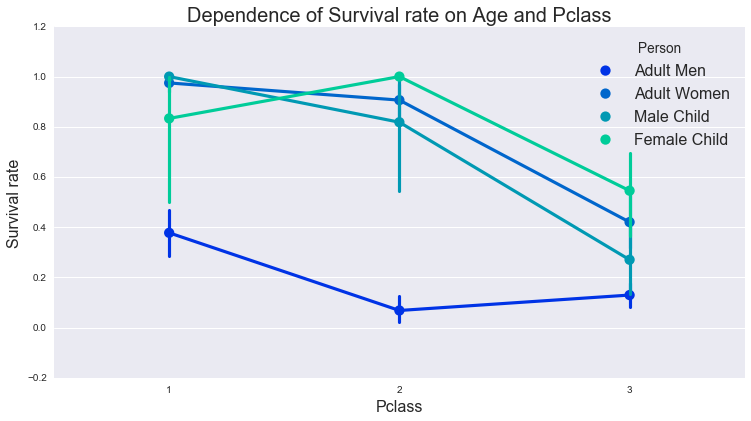

In [113]:
sns.set_style("darkgrid")
g=sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df,size=6, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("Pclass", "Survival rate")
sns.plt.title("Dependence of Survival rate on Age and Pclass")
sns.set(rc=rc)

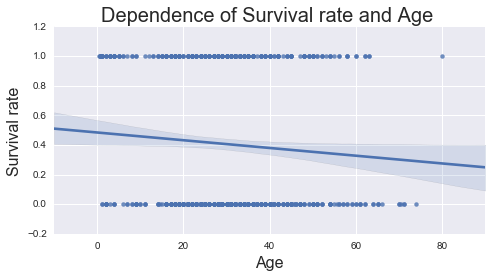

In [118]:
g=sns.lmplot('Age','Survived',data=titanic_df,size=4, aspect=1.8,palette="winter",legend_out=False)
g.set_axis_labels("Age", "Survival rate")
sns.plt.title("Dependence of Survival rate and Age ")
sns.set(rc=rc)

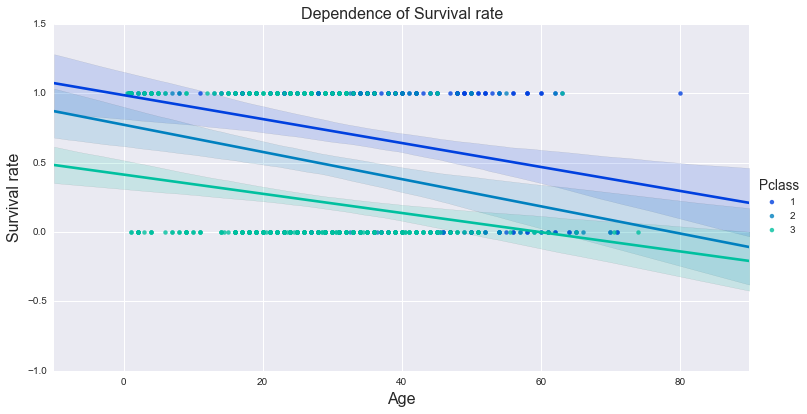

In [152]:
g=sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,size=6, aspect=1.8,palette="winter",legend_out=True)
g.set_axis_labels("Age", "Survival rate")
sns.plt.title("Dependence of Survival rate")
sns.set(rc=rc)

From the above two plots, we can see that  adult men are most unservived
compared to adult women and children. This might be due to priority given to female and children by resue workers. Simiarly, passengers in the third 
Pclass were not survived most compred to passengers in first and second 
Pclass. It is also found that older passengers tend to survive less compared to young passengers in the same Pclass.

# 4. STATISTICAL TEST

From the previous anlalysis, we have seen that the survival chance of passengers is different with different Pclass
and gender. Here I did a chi square test ( $\chi^{2}$ ) to determine whether there is a significant association between the two categorical variables. Namely;
1. Pclass and Survival
2. Gender and Survival.


Then our observed count values are the values other than the mariginal values.

In [4]:
observed_count =pclas_survival_table.ix[0:3,0:2]
#observed_count

Here, assuming independent from my null hypothesis, I used numpy's outer function to calculate the expected counts of
my contingency table.

In [45]:
expected_count =np.outer(for_test["row_total"][0:3],
                     for_test.ix["col_total"][0:2])/float(for_test.row_total[-1])
expected_count

array([[ 133.09090909,   82.90909091],
       [ 113.37373737,   70.62626263],
       [ 302.53535354,  188.46464646]])

Then let meconvert the expected_count array in to pandas data frame.

In [46]:
expected_count_df = pd.DataFrame(expected_count)
expected_count_df.columns=observed_count.columns
expected_count_df.index=observed_count.index
expected_count_df

,Not Survived,Survived
1,133.090909,82.909091
2,113.373737,70.626263
3,302.535354,188.464646


Calculating the chi_squared_value manually with degree of freedom of 2 and 99 % confidence level;

In [84]:
chi_squared_value = (((observed_count-expected_count_df)**2)/expected_count_df).sum().sum()

critical_value_Pclass_survival = stats.chi2.ppf(q = 0.999, df = 2)
#critical_value2 = stats.chi2.ppf(q = 0.99, df = 2)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=2)
print "Chi squared value"
print "{:f}".format(chi_squared_stat)
print"critical_value_Pclass_survival"
print "{:f}".format(critical_value_Pclass_survival)

print("P value")
print(p_value)

Chi squared value
102.888989
critical_value_Pclass_survival
13.815511
P value
0.0


Or using the scipy chi2_contingency function;

In [86]:
chi_test=stats.chi2_contingency(observed= observed_count)
print "Chi squared value"
print "{:f}".format(chi_test[0])
#print("Critical value")
print"critical_value_Pclass_survival"
print "{:f}".format(critical_value_Pclass_survival)
#print(chi_test[])
print("P value")
print(chi_test[1])

Chi squared value
102.888989
critical_value_Pclass_survival
13.815511
P value
4.5492517113e-23


At 0.001 level of significance and 2 degrees of freedom, the critical value is 13.815511. Since $\chi^{2}$ = 102.888989 > the critical value 13.815511, the null hypothesis of $\textit{Pclass and Survival are independent}$ can be rejected and the alternative hypothesis $\textit{Pclass and Survival are dependent}$ can be accepted. 

# $\chi^{2}$ Test for Gender and Survival

 Our null and alternative hypothesis are:
 
 Null Hypotesis ($\textit{H}_{0}$) :  

Gender and Survival are independent   : $\textit{Obseved_count}_{i}$= $\textit {Expected_count}_{i}$

Alternative Hypotesis ($\textit{H}_{1}$}) :

Gender and Survival are dependent:   $\textit{Obseved_count}_{i}$ $\neq$ $\textit {Expected_count}_{i}$

Following a similar procedure as in Pclass and Survial test with assumption of independence for the null hypothesis;

In [68]:
gender_survival_table=pd.crosstab(titanic_df.Sex, titanic_df.Survivals,margins=True)
gender_survival_table.columns=["Not Survived","Survived", "row_total"]
gender_survival_table.index=["female","male","col_total"]
gender_survival_table

,Not Survived,Survived,row_total
female,81,233,314
male,468,109,577
col_total,549,342,891


In [70]:
observed_count_gender_survival =gender_survival_table.ix[0:2,0:2]
observed_count_gender_survival


,Not Survived,Survived
female,81,233
male,468,109


In [96]:
critical_value = stats.chi2.ppf(q = 0.999, df = 2) # critical value for 99 % confidence level
chi_test_gender_survival= stats.chi2_contingency(observed= observed2) #the chi squared test
print "the critical value is"
print critical_value 
print "Chi squared value"
print "{:f}".format(chi_test_gender_survival[0])
#print("Critical value")
#print(chi_test[])
print("P value")
print(chi_test_gender_survival[1])


the critical value is
13.815510558
Chi squared value
260.717020
P value
1.19735706278e-58


Similarly, at 0.001 level of significanceand 2 degrees of freedom, the critical value is 13.81551. Since $\chi^{2}$ = 260.717020 > the critical value 13.81551, the null hypothesis of $\textit{Pclass and Survival are independent}$ can be rejected and the alternative hypothesis Pclass and Survival are dependent can be accepted. 

# Conclusion

From the investigation of titanic data set, we found interesting results 
about who the passengers were, who were survived and identified 
factors that might helped the passengers to survive. We found 
that  women and children were most survived passengers and adult men were 
most unsurvived passengers. It was also found that passengers in differet Pclass have different survival chances. For instance, passengers in the first Pclass were survived most compared to passengers in second and third Pclass. In order to see whether gender and Pclass had significant correlation with the survival chance of passengers, I did a chi sqare test and I found out that with 0.001 significant level and two degree of freedom both gender and Pclass were significantly related to the survival chance of the passengers. In general, the results of my analysis are good  representatives of the data and give some useful insights about it. However, I believe that this result is not complete by itself and is limited and insufficient to fully explain the data. One of the reasons for its insufficient explanation is  due to the missing values in the "$\textbf{Age}$" fields of the data. From 891 passengers, the age of 177 passengers were unknown. In my analysis of the data, I handeled the missing data using pandas built in functions such as in doing the age statistics, and my own user defined functions to filter these values, such as to categorize passengers by age into adults and children. However, inspite of my careful handling, I believe the missing data still might have the tendency to change some of the obtained results to some extent, especially on the survival statistics of adult (men and women) and children (men and women). 